# Community detection in Graph Data

### 1. Girvan Newman method
### 2. Hierarchical method

## 1. Girvan Newman method

In [24]:
#Data
setwd("C:/Users/pc/Desktop/개인project/project005/data")
library(igraph)

df<-read.table("karate_matrix.txt",stringsAsFactors=FALSE)
head(df) # adjacency matrix of karate data

V1,V2
"(2,1)",1
"(3,1)",1
"(4,1)",1
"(5,1)",1
"(6,1)",1
"(7,1)",1


In [25]:
#Data preprocessing
a1<-substr(df$V1,2,3)
a2<-substr(df$V1,4,6)
df2<-data.frame(a1,a2)
head(df2)

a1,a2
"2,",1)
"3,",1)
"4,",1)
"5,",1)
"6,",1)
"7,",1)


In [26]:
#Data preprocessing
for(i in 1:2){
  df2[,i]<-sapply(df2[,i],function(x)gsub(",","",x))
  df2[,i]<-sapply(df2[,i],function(x)gsub(")","",x))
  df2[,i]<-as.numeric(df2[,i])                
}
head(df2) #complete Edge List of Graph

a1,a2
2,1
3,1
4,1
5,1
6,1
7,1


In [27]:
mat<-matrix(rep(0,34*34),34)

len<-length(df2$a1)
for(i in 1:len){
    j<-df2[i,1]
    k<-df2[i,2]
    mat[j,k]<-1
} #make adjacency matrix

In [28]:
karate_g<-graph_from_adjacency_matrix(mat,mode="undirected") #graph form
karate_g

IGRAPH 9aaebda U--- 34 78 -- 
+ edges from 9aaebda:
 [1]  1-- 2  1-- 3  1-- 4  1-- 5  1-- 6  1-- 7  1-- 8  1-- 9  1--11  1--12
[11]  1--13  1--14  1--18  1--20  1--22  1--32  2-- 3  2-- 4  2-- 8  2--14
[21]  2--18  2--20  2--22  2--31  3-- 4  3-- 8  3-- 9  3--10  3--14  3--28
[31]  3--29  3--33  4-- 8  4--13  4--14  5-- 7  5--11  6-- 7  6--11  6--17
[41]  7--17  9--31  9--33  9--34 10--34 14--34 15--33 15--34 16--33 16--34
[51] 19--33 19--34 20--34 21--33 21--34 23--33 23--34 24--26 24--28 24--30
[61] 24--33 24--34 25--26 25--28 25--32 26--32 27--30 27--34 28--34 29--32
[71] 29--34 30--33 30--34 31--33 31--34 32--33 32--34 33--34

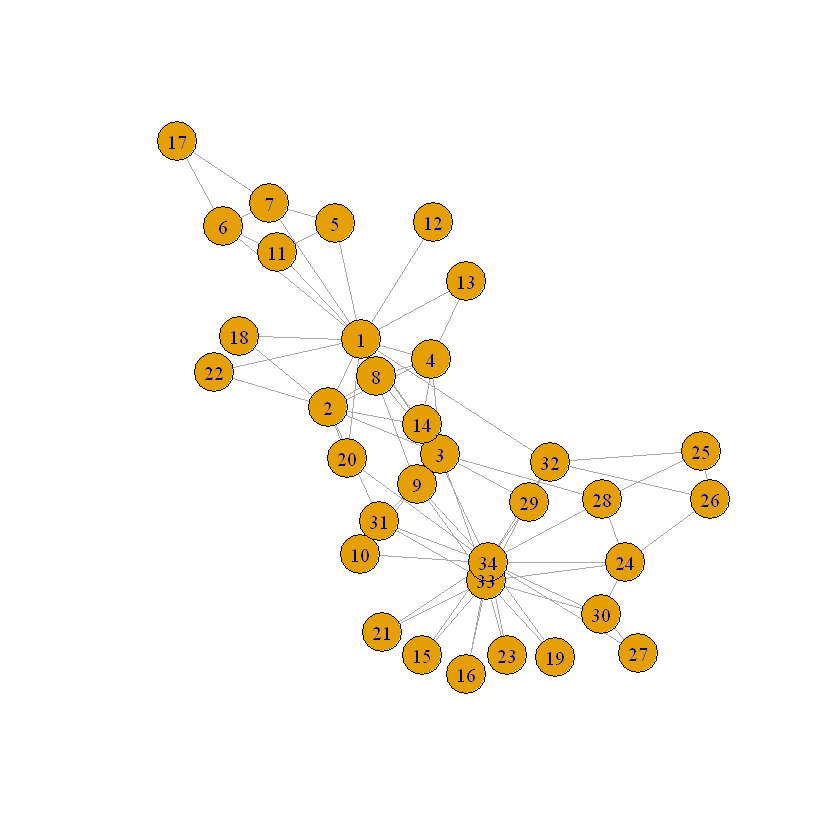

In [29]:
plot(karate_g)

In [30]:
#Algorithm of Girvan Newman method
new_g<-karate_g
edge_list<-list()
be_cent_vec<-c()


for(i in 1:100){
    eb<-edge.betweenness(new_g) #모든 edge의 betweenness centrality를 계산
    
    print(E(new_g)[which.max(eb)])
    edge_list[[i]]<-get.edgelist(new_g)[which.max(eb),]

    be_cent_vec<-c(be_cent_vec,max(eb))
    
    new_g<-delete.edges(new_g,which.max(eb)) #최대 betweenness centrality를 가지는 edge 지우고 그래프 갱신
    
    if(length(E(new_g))==0){
        break #더 자를 edge가 없으면 스톱
    }
    
}

+ 1/78 edge from 9aaebda:
[1] 1--32
+ 1/77 edge from 9ac04ac:
[1] 1--3
+ 1/76 edge from 9ac071b:
[1] 1--9
+ 1/75 edge from 9ac098b:
[1] 14--34
+ 1/74 edge from 9ac0bfa:
[1] 20--34
+ 1/73 edge from 9ac0e69:
[1] 3--33
+ 1/72 edge from 9ac10d9:
[1] 2--31
+ 1/71 edge from 9ac1348:
[1] 2--3
+ 1/70 edge from 9ac15b7:
[1] 3--4
+ 1/69 edge from 9ac1827:
[1] 3--8
+ 1/68 edge from 9ac1a96:
[1] 3--14
+ 1/67 edge from 9ac1d05:
[1] 10--34
+ 1/66 edge from 9ac1f75:
[1] 28--34
+ 1/65 edge from 9ac21e4:
[1] 3--10
+ 1/64 edge from 9ac26c3:
[1] 1--6
+ 1/63 edge from 9ac2932:
[1] 1--7
+ 1/62 edge from 9ac2ba1:
[1] 1--5
+ 1/61 edge from 9ac2e11:
[1] 1--11
+ 1/60 edge from 9ac3080:
[1] 32--34
+ 1/59 edge from 9ac32ef:
[1] 32--33
+ 1/58 edge from 9ac355e:
[1] 29--34
+ 1/57 edge from 9ac37ce:
[1] 24--26
+ 1/56 edge from 9ac3a3d:
[1] 24--28
+ 1/55 edge from 9ac3cad:
[1] 3--9
+ 1/54 edge from 9ac3f1c:
[1] 1--12
+ 1/53 edge from 9ac418b:
[1] 27--34
+ 1/52 edge from 9ac418b:
[1] 27--30
+ 1/51 edge from 9ac43fb:


In [31]:
edge_list #the order of deleting edge

[[1]]
[1]  1 32

[[2]]
[1] 1 3

[[3]]
[1] 1 9

[[4]]
[1] 14 34

[[5]]
[1] 20 34

[[6]]
[1]  3 33

[[7]]
[1]  2 31

[[8]]
[1] 2 3

[[9]]
[1] 3 4

[[10]]
[1] 3 8

[[11]]
[1]  3 14

[[12]]
[1] 10 34

[[13]]
[1] 28 34

[[14]]
[1]  3 10

[[15]]
[1] 1 6

[[16]]
[1] 1 7

[[17]]
[1] 1 5

[[18]]
[1]  1 11

[[19]]
[1] 32 34

[[20]]
[1] 32 33

[[21]]
[1] 29 34

[[22]]
[1] 24 26

[[23]]
[1] 24 28

[[24]]
[1] 3 9

[[25]]
[1]  1 12

[[26]]
[1] 27 34

[[27]]
[1] 27 30

[[28]]
[1]  1 13

[[29]]
[1]  4 13

[[30]]
[1] 15 33

[[31]]
[1] 15 34

[[32]]
[1] 16 33

[[33]]
[1] 16 34

[[34]]
[1] 25 28

[[35]]
[1] 29 32

[[36]]
[1] 19 33

[[37]]
[1] 19 34

[[38]]
[1]  1 18

[[39]]
[1]  2 18

[[40]]
[1] 21 33

[[41]]
[1] 21 34

[[42]]
[1]  1 20

[[43]]
[1]  2 20

[[44]]
[1] 5 7

[[45]]
[1]  6 11

[[46]]
[1] 23 33

[[47]]
[1] 23 34

[[48]]
[1]  1 22

[[49]]
[1]  2 22

[[50]]
[1]  3 28

[[51]]
[1]  9 33

[[52]]
[1]  9 34

[[53]]
[1]  9 31

[[54]]
[1] 31 33

[[55]]
[1] 31 34

[[56]]
[1] 1 8

[[57]]
[1] 2 8

[[58]]
[1] 4 8

[[59]]
[1] 1 2

[[60]]
[1] 1 4

[[61]]
[1]  1 14

[[62]]
[1] 2 4

[[63]]
[1]  2 14

[[64]]
[1]  3 29

[[65]]
[1]  4 14

[[66]]
[1]  5 11

[[67]]
[1] 6 7

[[68]]
[1]  6 17

[[69]]
[1]  7 17

[[70]]
[1] 24 30

[[71]]
[1] 24 33

[[72]]
[1] 24 34

[[73]]
[1] 25 26

[[74]]
[1] 25 32

[[75]]
[1] 26 32

[[76]]
[1] 30 33

[[77]]
[1] 30 34

[[78]]
[1] 33 34

In [32]:
be_cent_vec #the betweenness centrality of deleted edges

[1]  71.392857  66.895177  77.317399  82.002906 123.232917 100.205556
 [7] 143.626984 109.250000 107.666667 142.750000 285.000000  16.833333
[13]  18.183333  18.000000  15.333333  25.333333  25.000000  50.000000
[19]  14.500000  22.369048  25.616667  29.650000  40.666667  72.000000
[25]   9.000000   9.000000  11.000000   5.500000   8.000000   5.000000
[31]  10.000000   4.500000   9.000000   4.500000   9.000000   4.000000
[37]   8.000000   3.500000   7.000000   3.500000   7.000000   3.000000
[43]   6.000000   3.000000   6.000000   3.000000   6.000000   2.500000
[49]   5.000000   2.000000   2.000000   3.500000   5.000000   2.000000
[55]   4.000000   1.333333   2.000000   4.000000   1.000000   1.500000
[61]   3.000000   1.000000   2.000000   1.000000   1.000000   1.000000
[67]   1.000000   2.000000   1.000000   1.000000   1.500000   3.000000
[73]   1.000000   2.000000   1.000000   1.000000   2.000000   1.000000

In [33]:
#preprocessing for dendrogram
vertex.1<-0
vertex.2<-0

dend_df<-data.frame(vertex.1,vertex.2) #for dendrogram
head(dend_df)

vertex.1,vertex.2
0,0


In [34]:
#preprocessing for dendrogram
len<-length(edge_list)

for(i in 1:len){
    dend_df[i,]<-edge_list[[i]]
}

head(dend_df)

vertex.1,vertex.2
1,32
1,3
1,9
14,34
20,34
3,33


In [35]:
#preprocessing for dendrogram
dend_df$betweenness<-be_cent_vec
head(dend_df)

vertex.1,vertex.2,betweenness
1,32,71.39286
1,3,66.89518
1,9,77.31740
14,34,82.00291
20,34,123.23292
3,33,100.20556


In [36]:
#preprocessing for dendrogram
dend_df$dist<-len:1 #attribute the arbitrary distances for dendrogram
head(dend_df)

vertex.1,vertex.2,betweenness,dist
1,32,71.39286,78
1,3,66.89518,77
1,9,77.31740,76
14,34,82.00291,75
20,34,123.23292,74
3,33,100.20556,73


In [37]:
sum(dend_df$vertex.1<dend_df$vertex.2) #all vertex.2 is larger than vertex.1 in dend_df

[1] 78

In [38]:
#preprocessing for dendrogram
vertex_num<-length(V(karate_g)) #the total number of vertexs

k<-c()
for(i in 1:vertex_num^2){
    k[i]<-runif(1,100,200)
}

mat1<-matrix(k,vertex_num)
mat1<-as.data.frame(mat1)

dis<-dist(mat1)
dis #distance matrix shape of Girvan's method (the initial matrix for distance matrix)

          1        2        3        4        5        6        7        8
2  208.4793                                                               
3  225.7559 243.9484                                                      
4  235.5954 216.8616 270.4056                                             
5  224.6556 245.7076 251.6685 244.8083                                    
6  242.9588 224.1699 199.0605 245.1425 280.6921                           
7  202.9982 228.4964 255.1831 241.8556 257.5158 233.6652                  
8  224.9709 232.4212 249.5982 245.5512 218.4141 211.5848 186.4849         
9  208.7131 196.7915 226.2048 227.9064 212.6526 198.2481 227.2943 240.1651
10 232.1694 220.8461 237.6272 245.0871 230.8849 244.7121 242.1823 242.4323
11 237.3982 243.5901 245.2284 243.7133 229.8120 224.2031 255.3448 248.4198
12 210.1275 228.8913 204.3741 216.7387 228.1390 239.4714 210.0794 231.8519
13 223.7820 249.4994 247.4520 223.5141 253.0617 265.9649 202.4652 237.4395
14 242.9058 260.7854 238.

In [39]:
#preprocessing for dendrogram
mat2<-matrix(rep(200,34*34),34)

len<-length(dend_df$vertex.1)
for(i in 1:len){
    j<-dend_df[i,1] #열
    k<-dend_df[i,2] #행
    mat2[k,j]<-dend_df[i,4] #distance
} 

mat2<-mat2[-1,]

In [40]:
#preprocessing for dendrogram
mat2[upper.tri(mat2)]=0
mat2<-as.vector(mat2)
dend_vec<-mat2[mat2>0]
length(dend_vec)

[1] 561

In [41]:
dend_vec

[1]  20  77  19  62  64  63  23  76 200  61  54  51  18 200 200 200  41 200
 [19]  37 200  31 200 200 200 200 200 200 200 200 200  78 200 200  71  17 200
 [37] 200 200  22 200 200 200 200 200  16 200 200 200  40 200  36 200  30 200
 [55] 200 200 200 200 200 200 200  72 200 200 200  70 200 200 200  69  55  65
 [73] 200 200 200  68 200 200 200 200 200 200 200 200 200 200 200 200 200  29
 [91]  15 200 200 200  73 200 200 200 200  21 200 200 200 200  50  14 200 200
[109] 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
[127] 200  35 200 200 200  13 200 200 200 200 200 200 200 200 200 200 200 200
[145] 200 200 200 200 200 200 200 200 200 200 200  12 200 200 200  34 200 200
[163] 200 200 200  11 200 200 200 200 200 200 200 200 200 200 200 200 200 200
[181] 200 200 200 200 200 200 200 200 200 200 200 200  10 200 200 200 200 200
[199] 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
[217] 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
[235] 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
[253] 200 200 200 200 200  26 200  28  27 200 200 200 200 200 200 200 200 200
[271] 200 200 200 200 200 200 200 200 200 200 200 200 200 200  67 200 200 200
[289] 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
[307] 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
[325] 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
[343] 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
[361] 200 200 200 200 200 200 200 200 200 200  75 200 200 200 200 200 200 200
[379] 200 200 200 200 200 200 200 200 200 200  49  48 200 200 200 200 200 200
[397] 200 200 200 200 200 200 200 200 200 200  47  46 200 200 200 200 200 200
[415] 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
[433] 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
[451] 200 200 200 200  43  42 200 200 200 200 200 200 200 200 200 200 200 200
[469] 200  74 200 200 200 200 200 200 200 200 200 200 200  39  38 200 200 200
[487] 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
[505]  33  32 200  57 200  56 200   9 200 200   8   7   6 200  45 200 200 200
[523]   5 200 200 200 200 200 200 200   4 200 200 200 200  52 200 200 200  53
[541] 200 200 200 200 200  66 200 200  44 200  58 200 200   3   2 200  25  24
[559]  59  60   1

In [42]:
#preprocessing for dendrogram
len<-length(dend_vec)
for(i in 1:len){
    dis[i]<-dend_vec[i]
}
dis #make distance matrix for Girvan's algorithm

     1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
2   20                                                                        
3   77  71                                                                    
4   19  17  70                                                                
5   62 200 200 200                                                            
6   64 200 200 200 200                                                        
7   63 200 200 200  35  12                                                    
8   23  22  69  21 200 200 200                                                
9   76 200  55 200 200 200 200 200                                            
10 200 200  65 200 200 200 200 200 200                                        
11  61 200 200 200  13  34 200 200 200 200                                    
12  54 200 200 200 200 200 200 200 200 200 200                                
13  51 200 200  50 200 200 200 200 200 200 200 200  

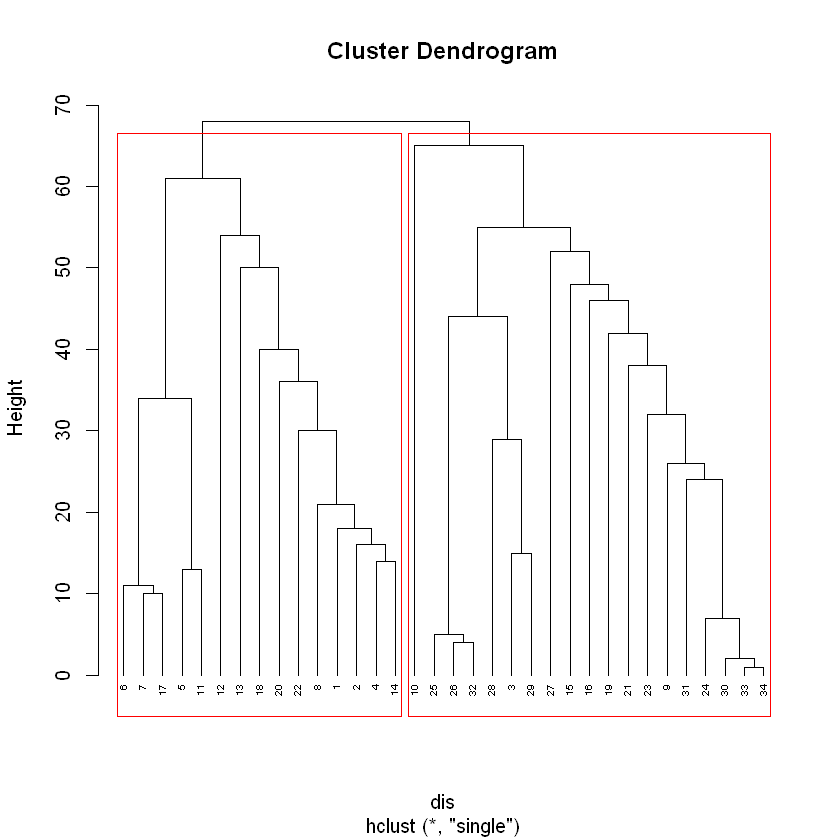

In [43]:
#Let's make dendrogram of result of Girvan Newan method.
hh<-hclust(dis,method="single")
plot(hh,hang=-1,cex=0.5)
rect.hclust(hh,k=2) #coincidence with paper's result, only number3 is misclassified.

## 2. Hierarchical method

In [44]:
#Hierarchical tree calculated by counting edge-independent paths.
mat3<-matrix(rep(0,34*34),34)

len<-34
for(j in 1:33){
    k<-j+1
    for(i in k:len){
        l<-1/edge_disjoint_paths(karate_g,i,j)    #count all edge independent paths between node i and j.
                                                  #max flow algorithm would be used in edge_disjoint_paths().
        mat3[i,j]<-l
        
    }
}
    
mat3 #matrix of 1/edge independent path counts

0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0,...,0.0000000,0.0000000,0.0,0.0000000,0.0000000,0.00,0.00,0.0000000,0.00000000,0
0.1111111,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0,...,0.0000000,0.0000000,0.0,0.0000000,0.0000000,0.00,0.00,0.0000000,0.00000000,0
0.1000000,0.1111111,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0,...,0.0000000,0.0000000,0.0,0.0000000,0.0000000,0.00,0.00,0.0000000,0.00000000,0
0.1666667,0.1666667,0.1666667,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0,...,0.0000000,0.0000000,0.0,0.0000000,0.0000000,0.00,0.00,0.0000000,0.00000000,0
0.3333333,0.3333333,0.3333333,0.3333333,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0,...,0.0000000,0.0000000,0.0,0.0000000,0.0000000,0.00,0.00,0.0000000,0.00000000,0
0.2500000,0.2500000,0.2500000,0.2500000,0.3333333,0.0000000,0.0000000,0.0000000,0.0000000,0.0,...,0.0000000,0.0000000,0.0,0.0000000,0.0000000,0.00,0.00,0.0000000,0.00000000,0
0.2500000,0.2500000,0.2500000,0.2500000,0.3333333,0.2500000,0.0000000,0.0000000,0.0000000,0.0,...,0.0000000,0.0000000,0.0,0.0000000,0.0000000,0.00,0.00,0.0000000,0.00000000,0
0.2500000,0.2500000,0.2500000,0.2500000,0.3333333,0.2500000,0.2500000,0.0000000,0.0000000,0.0,...,0.0000000,0.0000000,0.0,0.0000000,0.0000000,0.00,0.00,0.0000000,0.00000000,0
0.2000000,0.2000000,0.2000000,0.2000000,0.3333333,0.2500000,0.2500000,0.2500000,0.0000000,0.0,...,0.0000000,0.0000000,0.0,0.0000000,0.0000000,0.00,0.00,0.0000000,0.00000000,0
0.5000000,0.5000000,0.5000000,0.5000000,0.5000000,0.5000000,0.5000000,0.5000000,0.5000000,0.0,...,0.0000000,0.0000000,0.0,0.0000000,0.0000000,0.00,0.00,0.0000000,0.00000000,0
0.3333333,0.3333333,0.3333333,0.3333333,0.3333333,0.3333333,0.3333333,0.3333333,0.3333333,0.5,...,0.0000000,0.0000000,0.0,0.0000000,0.0000000,0.00,0.00,0.0000000,0.00000000,0


In [45]:
#preprocessing for dendrogram
mat3<-mat3[-1,]
mat3<-as.vector(mat3)
dend_vec<-mat3[mat3>0]

dis2<-dis

len<-length(dend_vec)
for(i in 1:len){
    dis2[i]<-dend_vec[i]
}
dis2 #make distance matrix for hierarchical clustering.
     #nodes in dendrogram will be liked in the ascending order of 1/(edge independent path counts).

            1          2          3          4          5          6          7
2  0.11111111                                                                  
3  0.10000000 0.11111111                                                       
4  0.16666667 0.16666667 0.16666667                                            
5  0.33333333 0.33333333 0.33333333 0.33333333                                 
6  0.25000000 0.25000000 0.25000000 0.25000000 0.33333333                      
7  0.25000000 0.25000000 0.25000000 0.25000000 0.33333333 0.25000000           
8  0.25000000 0.25000000 0.25000000 0.25000000 0.33333333 0.25000000 0.25000000
9  0.20000000 0.20000000 0.20000000 0.20000000 0.33333333 0.25000000 0.25000000
10 0.50000000 0.50000000 0.50000000 0.50000000 0.50000000 0.50000000 0.50000000
11 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
12 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000
13 0.50000000 0.50000000 0.50000000 0.50

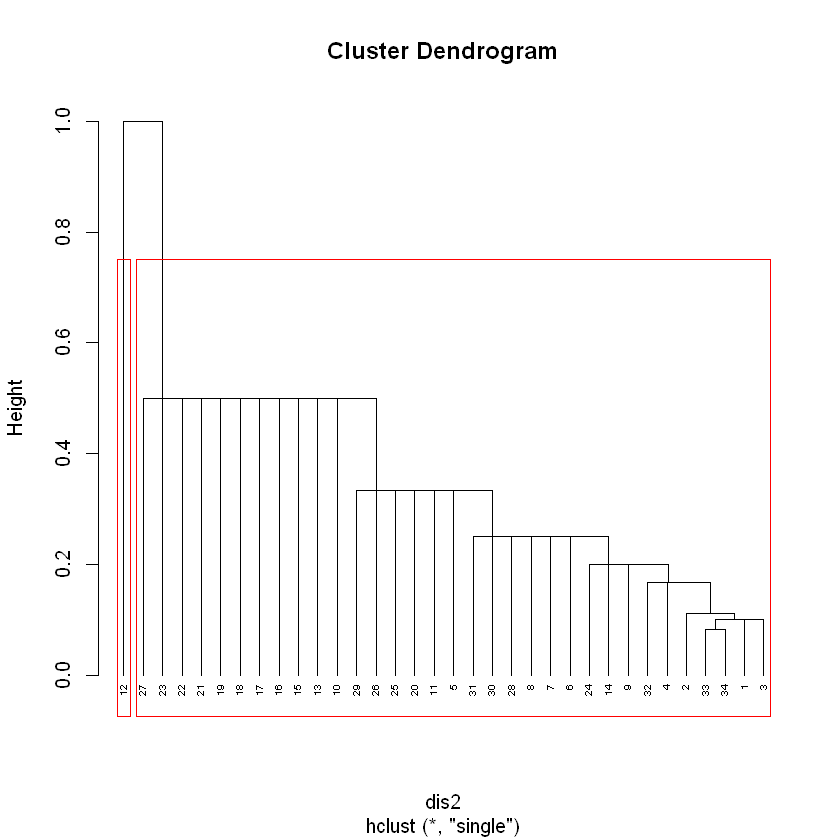

In [46]:
hh2<-hclust(dis2,method="single")
plot(hh2,hang=-1,cex=0.5)
rect.hclust(hh2,k=2) #coincidence with paper's result, poor performance!